In [20]:
## import necessary libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import MinMaxScaler, StandardScaler, normalize
from sklearn.decomposition import PCA
from sklearn.preprocessing import OneHotEncoder
import random
##import libraries for ANN

import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout 
from tensorflow.keras.models import Sequential

In [21]:
## warning 
import warnings 
warnings.filterwarnings('ignore')

In [22]:
## load the dataset
concharityvis = pd.read_csv('country-data.csv')
concharityvis

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Haiti,208.00,15.30,6.91,64.70,1500,5.45,32.10,3.33,662
1,Sierra Leone,160.00,16.80,13.10,34.50,1220,17.20,55.00,5.20,399
2,Chad,150.00,36.80,4.53,43.50,1930,6.39,56.50,6.59,897
3,Central African Republic,149.00,11.80,3.98,26.50,888,2.01,47.50,5.21,446
4,Mali,137.00,22.80,4.98,35.10,1870,4.37,59.50,6.55,708
...,...,...,...,...,...,...,...,...,...,...
162,Sweden,3.00,46.20,9.63,40.70,42900,0.99,81.50,1.98,52100
163,Finland,3.00,38.70,8.95,37.40,39800,0.35,80.00,1.87,46200
164,Luxembourg,2.80,175.00,7.77,142.00,91700,3.62,81.30,1.63,105000
165,Singapore,2.80,200.00,3.96,174.00,72100,-0.05,82.70,1.15,46600


In [23]:
####Exploratory data analysis---Plotting HEATMAP---Correlation data
# Create a heatmap
## Here I want to see the corr-mat in table as it is  little clearer for the numbers
corr_mat = concharityvis.corr(numeric_only=True)
pd.options.display.float_format = '{:.2f}'.format
corr_mat

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
child_mort,1.00,-0.32,-0.20,-0.13,-0.52,0.29,-0.89,0.85,-0.48
exports,-0.32,1.00,-0.11,0.74,0.52,-0.11,0.32,-0.32,0.42
health,-0.20,-0.11,1.00,0.10,0.13,-0.26,0.21,-0.20,0.35
imports,-0.13,0.74,0.10,1.00,0.12,-0.25,0.05,-0.16,0.12
income,-0.52,0.52,0.13,0.12,1.00,-0.15,0.61,-0.50,0.90
inflation,0.29,-0.11,-0.26,-0.25,-0.15,1.00,-0.24,0.32,-0.22
life_expec,-0.89,0.32,0.21,0.05,0.61,-0.24,1.00,-0.76,0.60
total_fer,0.85,-0.32,-0.20,-0.16,-0.50,0.32,-0.76,1.00,-0.45
gdpp,-0.48,0.42,0.35,0.12,0.90,-0.22,0.60,-0.45,1.00


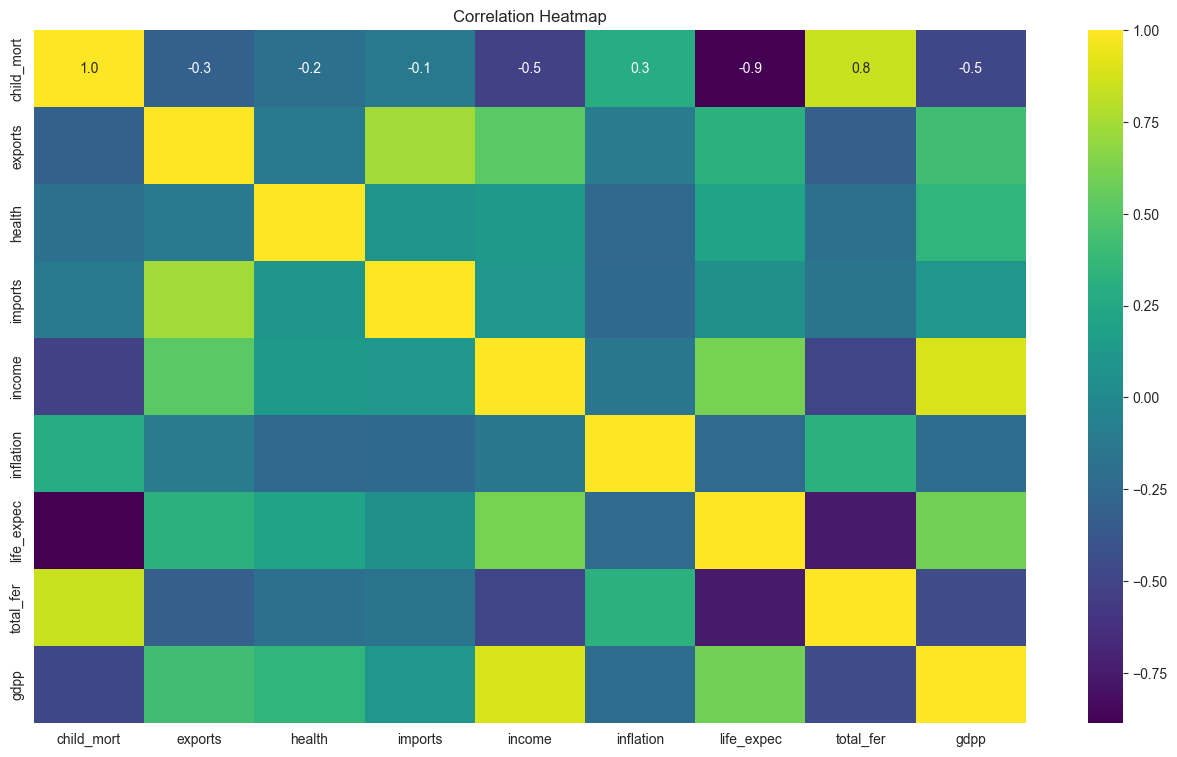

In [24]:
plt.figure(figsize=(16,9))
sns.heatmap(corr_mat, annot=True, cmap="viridis", fmt=".1f")
plt.title("Correlation Heatmap")
plt.show()

As we can see, some features have good correlation together and some has no correlation

## Line graph of Child mortality and countries frequency
most countries have a very low child mortality and only few countries has higher rate in child mortality

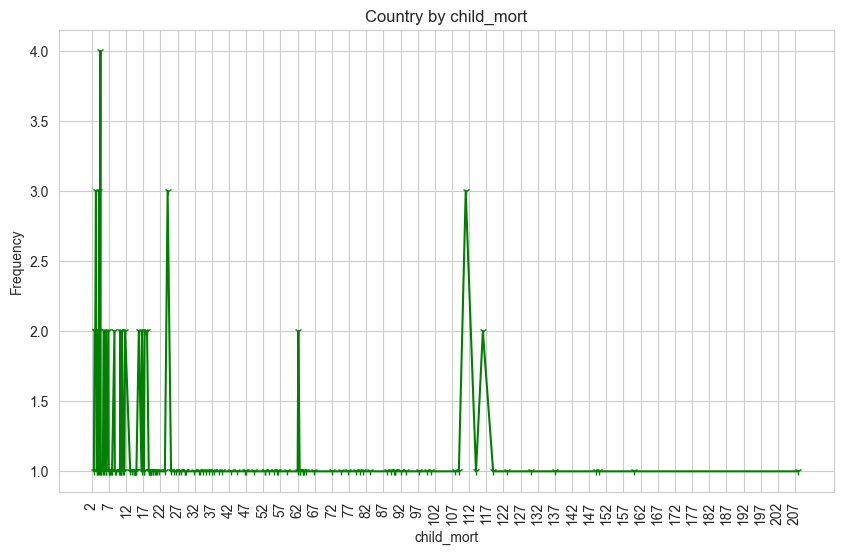

In [25]:
# Exploring Frequency o by child_mort
child_mort = concharityvis['child_mort'].value_counts().sort_index()

# Line chart to visualize of survival by Age
plt.figure(figsize=(10, 6))
plt.plot(child_mort.index, child_mort.values, marker='1', linestyle='-', color='green')
plt.title('Country by child_mort')
plt.xlabel('child_mort')
plt.ylabel('Frequency')
plt.xticks(range(int(min(child_mort.index)), int(max(child_mort.index)) + 1, 5), rotation=0)
plt.xticks(rotation=0)
plt.grid(True)  # Add grid lines for better readability
plt.xticks(rotation=90)
plt.show()

Th above Line graph shows us the number of countries with the number of child mortality

## Scatter plot income vs all Countries
There are some countries with very high income and many countries with much lower income

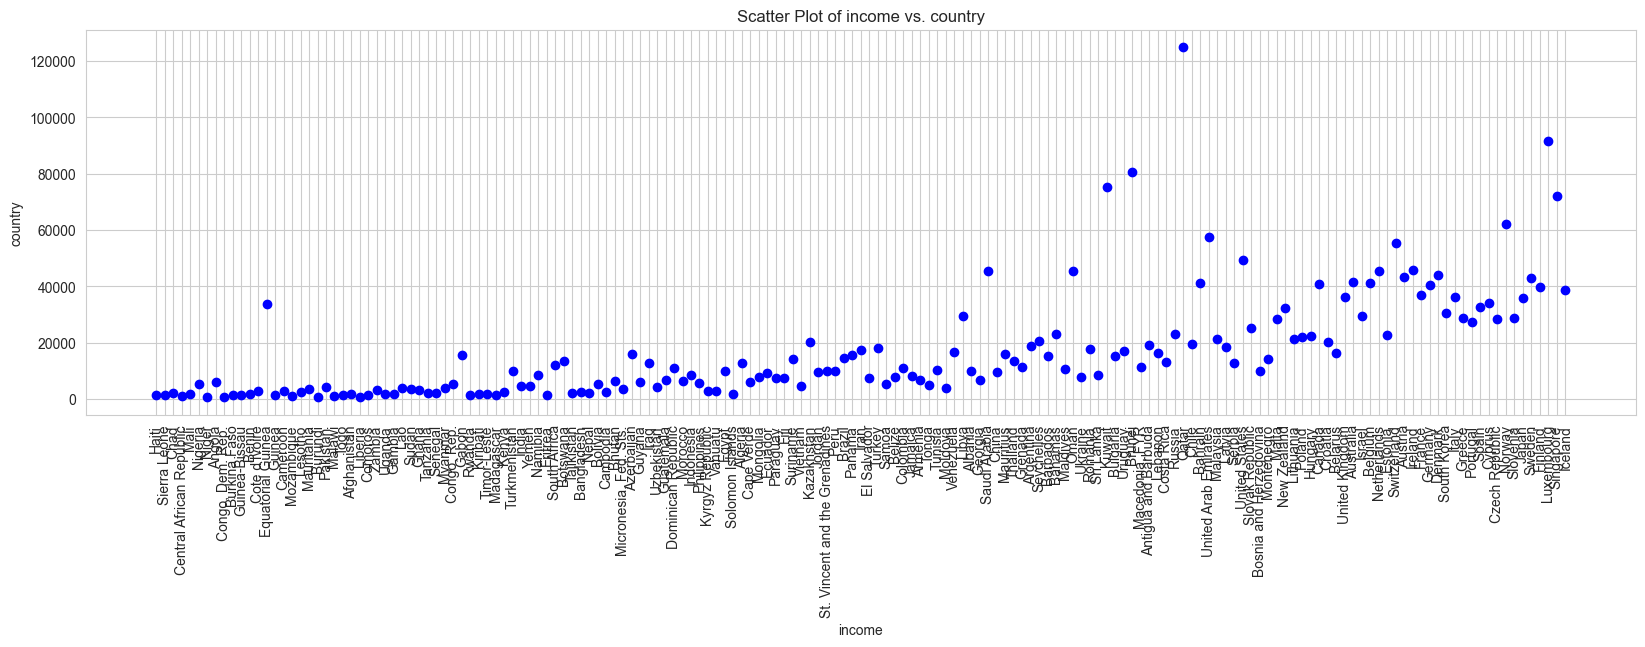

In [26]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(20, 5))

# Scatter Plot
ax.scatter(concharityvis['country'], concharityvis['income'], c='blue')
ax.set_xlabel('income')
ax.set_ylabel('country')  # Adjusted y-axis label
ax.set_title('Scatter Plot of income vs. country')  # Improved title
plt.grid(True)  # Add grid lines for better readability
plt.xticks(rotation=90)
plt.show()

## Top 5 Countries in health(PIE Chart)
This chart is nice and very clear to see the top 5 countries regarding Health

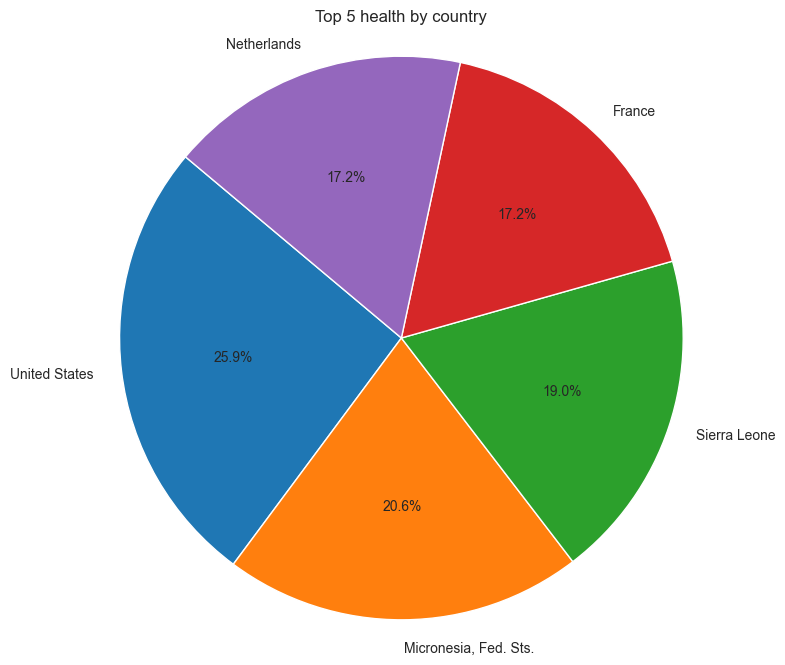

In [27]:
# Top five countries in Health 
top_5_health = concharityvis.groupby('country')['health'].sum().nlargest(5)

# Create a pie chart
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 8))
plt.pie(top_5_health, labels=top_5_health.index, autopct='%1.1f%%', startangle=140)
plt.title('Top 5 health by country')
plt.axis('equal')  # Equal aspect ratio ensures a circular pie chart
plt.show()


## Top ten contries in life expectancy

In [28]:
import pandas as pd
### Sort the DataFrame by 'life_expec' in descending order and select the top 10 rows
top_10_life_expec = concharityvis.sort_values(by='life_expec', ascending=False).head(10)

# Display the top 10 countries with the highest life expectancy
print(top_10_life_expec[['country', 'life_expec']])

         country  life_expec
161        Japan       82.80
165    Singapore       82.70
146  Switzerland       82.20
166      Iceland       82.00
141    Australia       82.00
156        Spain       81.90
153        Italy       81.70
162       Sweden       81.50
142       Israel       81.40
149       France       81.40


In [29]:
# Merge the 'top_10_life_expec' DataFrame with on the 'country' column
top_10_life_expec = top_10_life_expec.merge(concharityvis[['country', 'income']], on='country', how='left')

# Display the updated DataFrame with both 'life_expec' and 'income'
print(top_10_life_expec)

       country  child_mort  exports  health  imports  income_x  inflation  \
0        Japan        3.20    15.00    9.49    13.60     35800      -1.90   
1    Singapore        2.80   200.00    3.96   174.00     72100      -0.05   
2  Switzerland        4.50    64.00   11.50    53.30     55500       0.32   
3      Iceland        2.60    53.40    9.40    43.30     38800       5.47   
4    Australia        4.80    19.80    8.73    20.90     41400       1.16   
5        Spain        3.80    25.50    9.54    26.80     32500       0.16   
6        Italy        4.00    25.20    9.53    27.20     36200       0.32   
7       Sweden        3.00    46.20    9.63    40.70     42900       0.99   
8       Israel        4.60    35.00    7.63    32.90     29600       1.77   
9       France        4.20    26.80   11.90    28.10     36900       1.05   

   life_expec  total_fer   gdpp  income_y  
0       82.80       1.39  44500     35800  
1       82.70       1.15  46600     72100  
2       82.20       

## Bar chart for all countries/ Income and life expectancy
incomes are in 1000

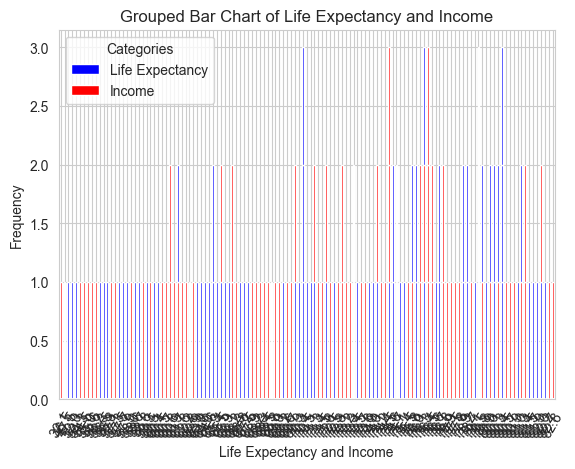

In [30]:

# Group the data by 'life_expec' and 'income' and count the occurrences, Frequency
life_expec = concharityvis.groupby(['life_expec', 'income']).size().unstack()

# Define custom colors for 'life_expec' and 'income'
colors = ['blue', 'red']

# Create a grouped bar chart
life_expec.plot(kind='bar', stacked=True, color=colors)
plt.title('Grouped Bar Chart of Life Expectancy and Income')
plt.xlabel('Life Expectancy and Income')
plt.ylabel('Frequency')
plt.xticks(rotation=60)
plt.legend(title='Categories', labels=['Life Expectancy', 'Income'])
plt.show()


## Bar chart of Life expectancy of top 20 countries decending in Life expectancy
Bars stack in 2 diff color, life expectancy on top of income

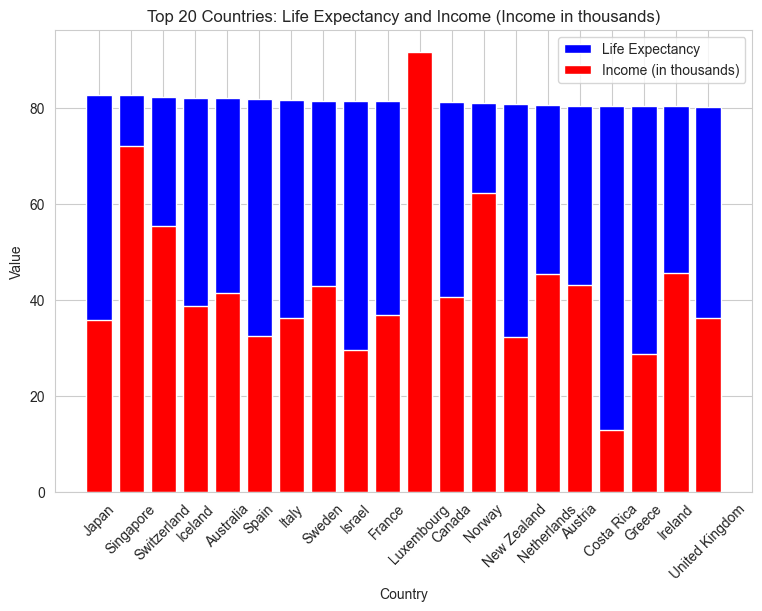

In [31]:
# Sort the DataFrame by 'life_expec' in descending order and select the top 20 rows
top_20_life_expec = concharityvis.sort_values(by='life_expec', ascending=False).head(20)

# Divide the income values by 1000 for visualization
top_20_life_expec['income'] /= 1000

# Create a grouped bar chart for 'life_expec' and 'income'
plt.figure(figsize=(9, 6))
plt.bar(top_20_life_expec['country'], top_20_life_expec['life_expec'], label='Life Expectancy', color='blue')
plt.bar(top_20_life_expec['country'], top_20_life_expec['income'], label='Income (in thousands)', color='red')
plt.title('Top 20 Countries: Life Expectancy and Income (Income in thousands)')
plt.xlabel('Country')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.legend()
plt.show()


## Bar chart of Life expectancy of top 20 countries from lowest income, ascending income
Bars stack in 2 diff color, next together

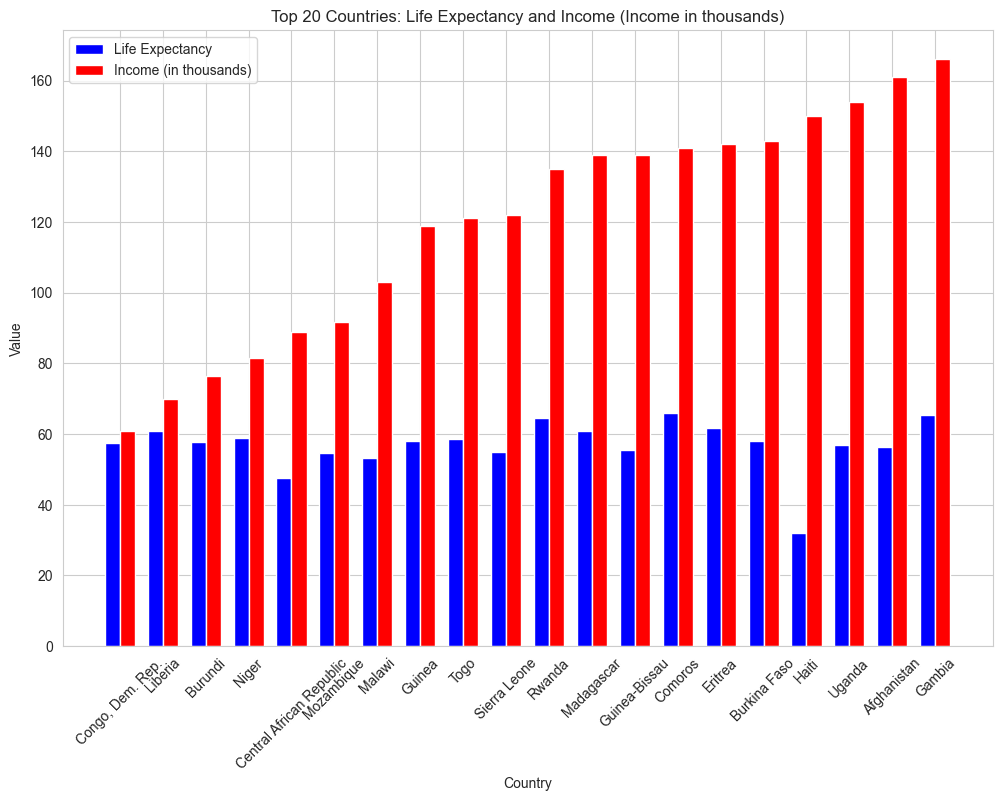

In [32]:
import numpy as np

# Sort the DataFrame by 'income' in ascending order and select the top 20 rows
top_20_income = concharityvis.sort_values(by='income', ascending=True).head(20)

#No we divide the income values by 1000 for visualization as the income numbers are so big
top_20_income['income'] /= 10

# Create positions for the bars
positions = np.arange(len(top_20_income))
bar_width = 0.35

plt.figure(figsize=(12, 8))

# Create bars for 'life_expec'
plt.bar(positions - bar_width / 2, top_20_income['life_expec'], bar_width, label='Life Expectancy', color='blue')

# Create bars for 'income'
plt.bar(positions + bar_width / 2, top_20_income['income'], bar_width, label='Income (in thousands)', color='red')

plt.title('Top 20 Countries: Life Expectancy and Income (Income in thousands)')
plt.xlabel('Country')
plt.ylabel('Value')
plt.xticks(positions, top_20_income['country'], rotation=45)
plt.legend()
plt.show()


##Two separate bars are created side by side for "Life Expectancy" and "Income" for each country.
The x-positions for the bars are adjusted to place the bars side by side.
The x-axis labels are rotated for readability.

## Histogram of Life expectancy and countries

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


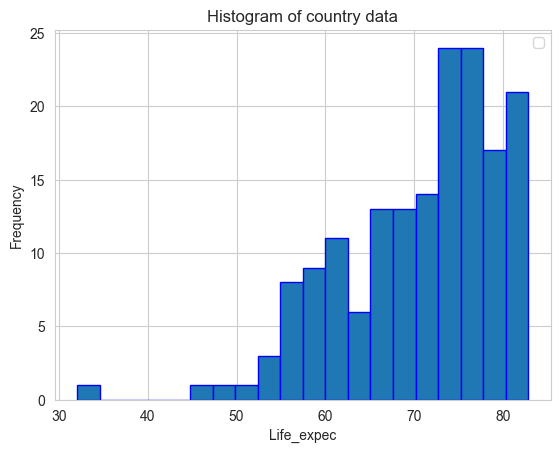

In [33]:
import matplotlib.pyplot as plt

# Create a histogram of earthquake magnitudes
plt.hist(concharityvis['life_expec'], bins=20, edgecolor='b')

plt.title('Histogram of country data')
plt.xlabel('Life_expec')
plt.ylabel('Frequency')
plt.legend()

## Random 20 countries; Life expectancy and income
I am just choosing random countries not based on top ones or bottom ones

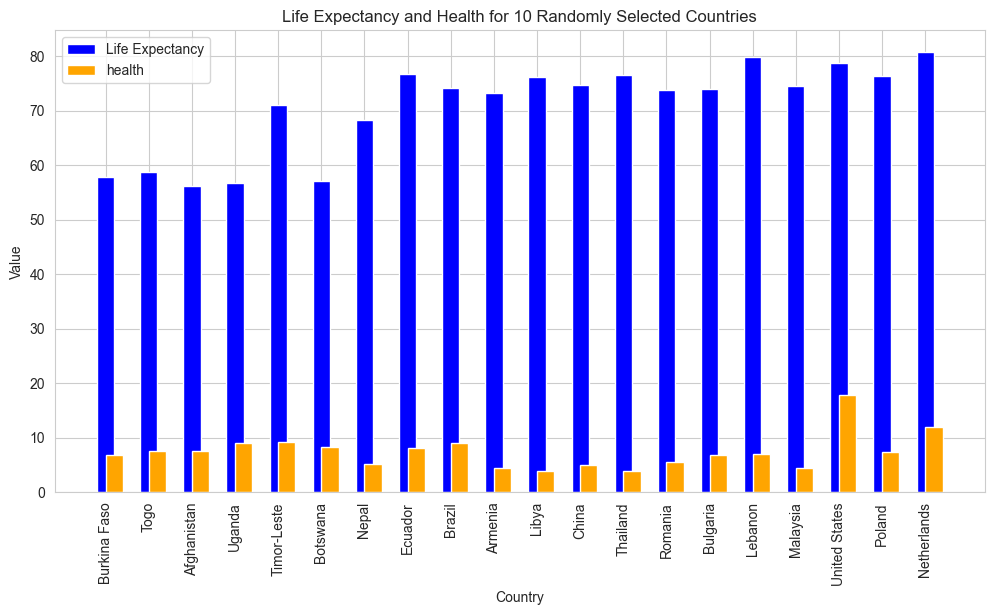

In [34]:
import random
# Randomly select 10 countries from your DataFrame
random_countries = random.sample(concharityvis['country'].tolist(), 20)

# Create a DataFrame for the selected countries
selected_data = concharityvis[concharityvis['country'].isin(random_countries)]

# Set the width of the bars
bar_width = 0.4

# Create a bar chart for 'life expectancy' (blue) and 'income' (orange)
fig, ax = plt.subplots(figsize=(12, 6))

# Calculate the x-positions for bars
x = range(len(selected_data))

plt.bar(x, selected_data['life_expec'], width=bar_width, label='Life Expectancy', color='blue')
plt.bar(x, selected_data['health'], width=bar_width, label='health', color='orange', align='edge')

# Set the x-axis labels and rotate them for readability
plt.xticks(x, selected_data['country'], rotation=90)

plt.xlabel('Country')
plt.ylabel('Value')
plt.title('Life Expectancy and Health for 10 Randomly Selected Countries')
plt.legend()
plt.show()


## Histogram of all features/ to see all the picture

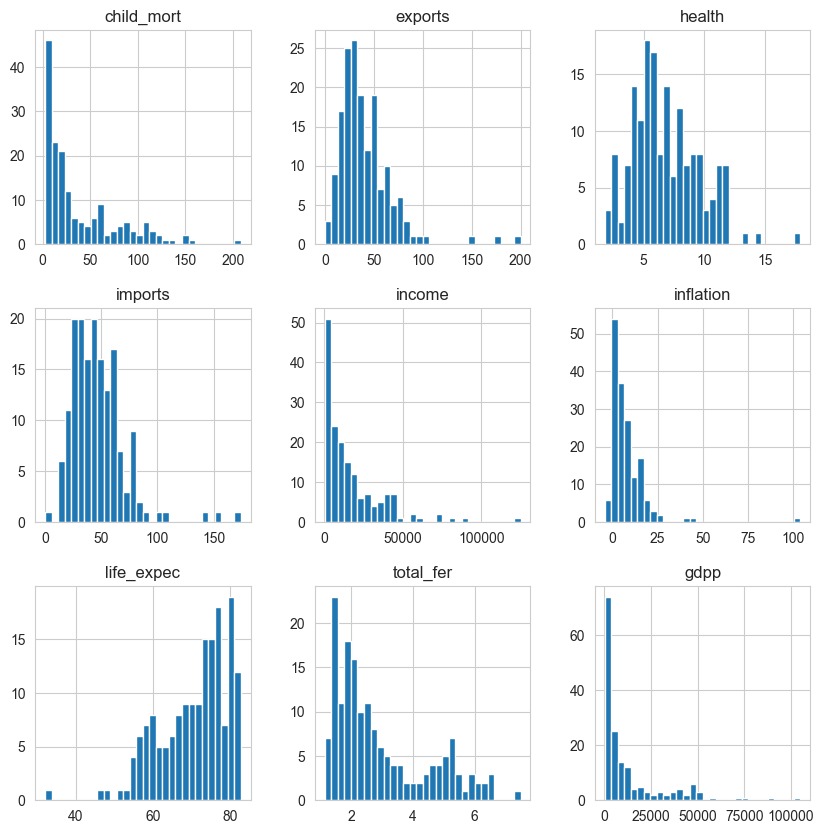

In [35]:
#  plot the distribution for all the numerical features.
concharityvis.hist(bins=30,figsize=(10,10));

## Top 20 countries- Exports and impoerts
Decending in Export for top 20 countries

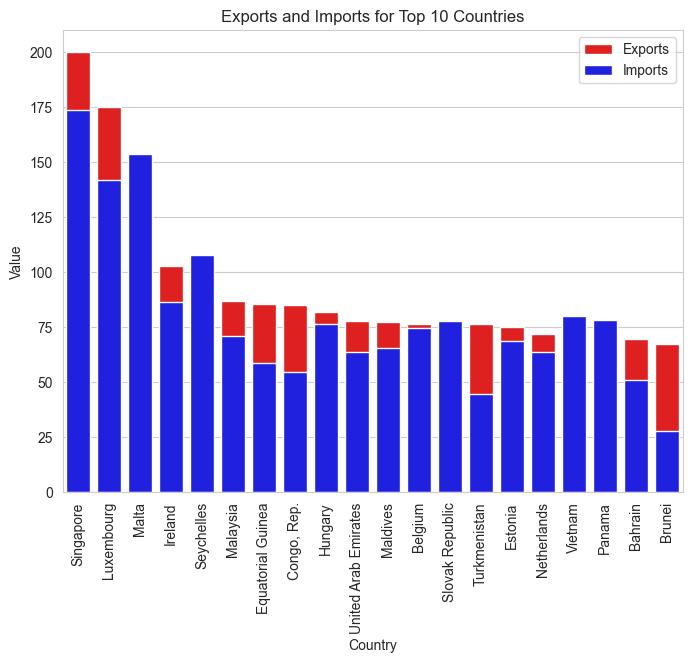

In [36]:
##from max export to lower
# Sort the DataFrame by 'export' in descending order and select the top 10 rows
top_20_country = concharityvis.sort_values(by='exports', ascending=False).head(20)

# Create a bar chart to visualize 'export' and 'import'
plt.figure(figsize=(8, 6))
sns.set_style("whitegrid")
sns.barplot(data=top_20_country, x='country', y='exports', color='red', label='Exports')
sns.barplot(data=top_20_country, x='country', y='imports', color='blue', label='Imports')
plt.title("Exports and Imports for Top 10 Countries")
plt.xlabel('Country')
plt.ylabel('Value')
plt.xticks(rotation=90)
plt.legend()
plt.show()


## Bar chart , Top 10 countries of health; Health, total_fer and child_mort

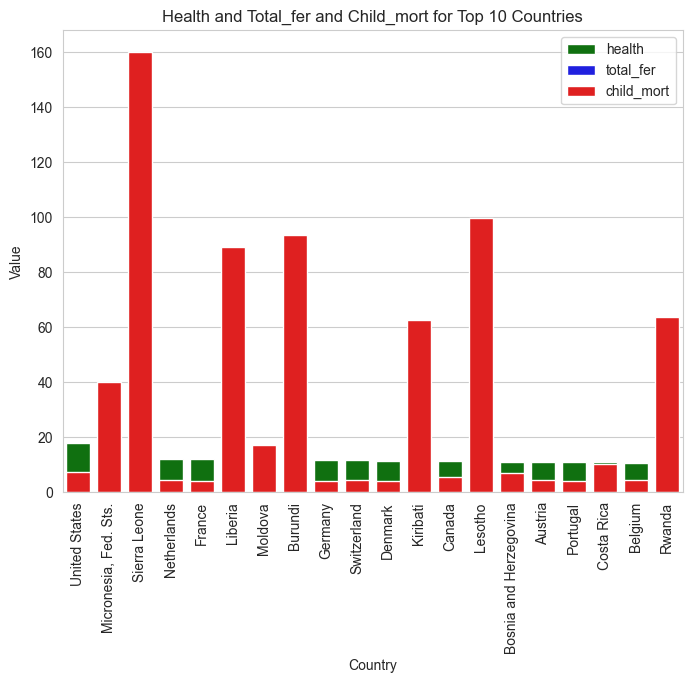

In [37]:

# Sort the DataFrame by 'health' in descending order and select the top 10 rows
top_20_country = concharityvis.sort_values(by='health', ascending=False).head(20)

# Create a bar chart to visualize 'health' and 'total_fer' and 'child_mort'
plt.figure(figsize=(8, 6))
sns.barplot(data=top_20_country, x='country', y='health', color='green', label='health')
sns.barplot(data=top_20_country, x='country', y='total_fer', color='blue', label='total_fer')
sns.barplot(data=top_20_country, x='country', y='child_mort', color='red', label='child_mort')
plt.title("Health and Total_fer and Child_mort for Top 10 Countries")
plt.xlabel('Country')
plt.ylabel('Value')
plt.xticks(rotation=90)
plt.legend()
plt.show()
